# Support Vector Regression (SVR)

### importing Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing Datasets

In [31]:
data = pd.read_csv('Position_Salaries.csv')

In [32]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Checking Missing Data

In [33]:
data.isnull().values.any()

False

### Getting our dependent and independent variables

In [34]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [35]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [36]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

### Reshape the dependent variable as Feature Scaling would want the format

In [37]:
y = y.reshape(len(y), 1)

In [38]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Features Scaling
**It is required we scale the dependent variables also because its not in zeros and Ones and there are no explicit equations for SVR**

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [40]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [41]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Applying the SVR model from the SVM Module

In [42]:
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(x, y)

/home/leke/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Print the new result (6.5) by the model

In [43]:
regressor.predict(x).reshape(len(x), 1)

array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

In [44]:
sc_y.inverse_transform(regressor.predict(x).reshape(len(x), 1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

In [45]:
#sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

A = regressor.predict(sc_x.transform([[6.5]]))
A = A.reshape(-1, 1)

In [46]:
sc_y.inverse_transform(A)

array([[170370.0204065]])

In [47]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [48]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


### Observing the regression Curve

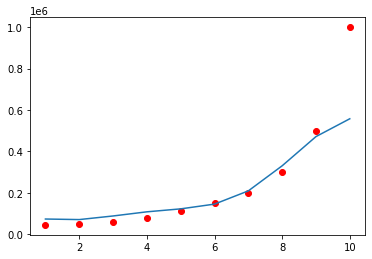

In [49]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(len(x), 1)))

### Visualizing the Model result for higer resolution and smoother curve

In [50]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)

In [51]:
x_grid = x_grid.reshape(len(x_grid), 1)

In [52]:
#regressor.predict(sc_x.transform(x_grid).reshape(len(x_grid), 1))
x_grid_pred_reshape = regressor.predict(sc_x.transform(x_grid))
x_grid_pred_reshape = x_grid_pred_reshape.reshape(len(x_grid_pred_reshape), 1)
x_grid_pred_reshape

array([[-0.6197853 ],
       [-0.62525029],
       [-0.62965521],
       [-0.63300802],
       [-0.63532454],
       [-0.63662807],
       [-0.63694918],
       [-0.63632519],
       [-0.63479971],
       [-0.63242213],
       [-0.62924694],
       [-0.62533311],
       [-0.62074342],
       [-0.61554369],
       [-0.60980206],
       [-0.60358823],
       [-0.59697272],
       [-0.59002609],
       [-0.58281818],
       [-0.57541738],
       [-0.56788994],
       [-0.56029919],
       [-0.55270493],
       [-0.54516272],
       [-0.53772326],
       [-0.53043178],
       [-0.52332744],
       [-0.51644279],
       [-0.50980324],
       [-0.50342653],
       [-0.49732233],
       [-0.49149176],
       [-0.48592702],
       [-0.4806111 ],
       [-0.47551745],
       [-0.47060983],
       [-0.46584212],
       [-0.46115831],
       [-0.45649253],
       [-0.45176923],
       [-0.44690338],
       [-0.44180094],
       [-0.43635935],
       [-0.43046818],
       [-0.42401003],
       [-0

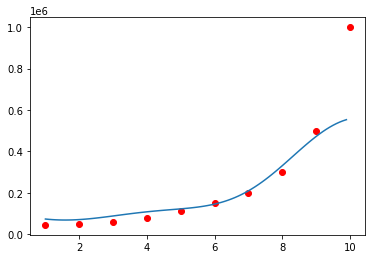

In [53]:
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(x_grid_pred_reshape))

### Rregression Model Selection

In [54]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Calculating for how well the Model learns the relationship of the data using the r2_score class from the sklearn.metrics module from sklearn api

In [56]:
from sklearn.metrics import r2_score
r2_score(sc_y.inverse_transform(y),sc_y.inverse_transform(regressor.predict(x).reshape(len(x), 1)))

0.7516001070620798